In [3]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [2]:
def find_indice(info_df, cell_type='', assay=''):
    mask = info_df['cell_type'].str.contains(cell_type, case=False) & info_df['assay'].str.contains(assay, case=False)
    indice = info_df[mask].index
    print(f'{cell_type} {assay} {len(indice)} data found.')
    return indice


def find_indice_precise(info_df, cell_types=[], assays=[]):
    if not cell_types and not assays:
        print('both cell_types and assays are empty, return all indices.')
        return info_df.index
    # Create masks based on the provided criteria
    cell_type_mask = info_df['cell_type'].isin(cell_types) if cell_types else True
    assay_mask = info_df['assay'].isin(assays) if assays else True

    # Combine masks
    mask = cell_type_mask & assay_mask
    indice = info_df[mask].index

    return indice


def compute_pred(main_df, info_df, pred_array, cell_type, assay):
    filtered_indice = find_indice(info_df, cell_type, assay)
    if len(filtered_indice) == 0:
        return

    print(info_df.iloc[filtered_indice])
    for i in filtered_indice:
        print(f'pearson r between true and {i} = {pearsonr(main_df[cell_type], pred_array[:, i])}')
    # for i in filtered_indice:
    #     print(f'pearson r between encode and {i} = {pearsonr(Gosai_designed_sei_pred[:, i], Gosai_designed_sei_pred[:, i])}')
    main_df[f'{cell_type}_{assay}_pred'] = pred_array[:, filtered_indice].mean(axis=1)
    # main_df[f'{cell_type}_{assay}_pred_logit'] = logit(main_df[f'{cell_type}_{assay}_pred'])

    return pred_array[:, filtered_indice].mean(axis=1)


def plot(main_df, cell_type, assay):
    x = main_df[f'{cell_type}_{assay}_pred']
    y = main_df[cell_type]
    r = pearsonr(x, y)[0]
    print(f'pearson r = {r:.3f}')

    fig, ax = plt.subplots(figsize=(8, 6), dpi=50)
    left, right, bottom, top = 0.13, 0.93, 0.15, 0.95
    ax.set_position([left, bottom, right - left, top - bottom])
    sns.scatterplot(x=x, y=y, s=1, edgecolor=None, ax=ax)
    ax.set_xlabel(f'{cell_type}_{assay}_pred')
    ax.set_ylabel(f'{cell_type}_MPRA_true')
    ax.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=ax.transAxes, fontsize=16)
    plt.savefig(f'figures/{cell_type}_{assay}_pred.png', dpi=200)


def plot_logit(main_df, cell_type, assay):
    x = logit(main_df[f'{cell_type}_{assay}_pred'])
    y = main_df[cell_type]
    r = pearsonr(x, y)[0]
    print(f'pearson r = {r:.3f}')

    plot_scatter(x, y, 
                 xlabel=f'{cell_type}_{assay}_pred_logit', 
                 ylabel=f'{cell_type}_MPRA_true', 
                 text=f'pearson r = {r:.3f}', 
                 title=f'', 
                 filename=f'{cell_type}_{assay}_pred_logit')

    # fig, ax = plt.subplots(figsize=(8, 6), dpi=50)
    # left, right, bottom, top = 0.13, 0.93, 0.15, 0.95
    # ax.set_position([left, bottom, right - left, top - bottom])
    # sns.scatterplot(x=x, y=y, s=1, edgecolor=None, ax=ax)
    # ax.set_xlabel(f'{cell_type}_{assay}_pred_logit')
    # ax.set_ylabel(f'{cell_type}_MPRA_true')
    # ax.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=ax.transAxes, fontsize=16)
    # plt.savefig(f'figures/{cell_type}_{assay}_pred_logit.png', dpi=200)

    # plt.figure(figsize=(8, 6), dpi=50)
    # sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
    # plt.xlabel(f'{cell_type}_{assay}_pred_logit')
    # plt.ylabel(f'{cell_type}_MPRA_true')
    # plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
    # plt.savefig(f'figures/{cell_type}_{assay}_pred_logit.png', dpi=300, bbox_inches='tight')


def plot_scatter(x, y, xlabel='', ylabel='', text='', title='', filename=''):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=50)
    left, right, bottom, top = 0.13, 0.93, 0.15, 0.95
    ax.set_position([left, bottom, right - left, top - bottom])
    sns.scatterplot(x=x, y=y, s=1, edgecolor=None, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.text(x=0.1, y=0.9, s=text, transform=ax.transAxes, fontsize=16)
    plt.title(title)
    plt.savefig(f'figures/{filename}.png', dpi=200)


def plot_logit_diff(main_df, cell_type1, cell_type2, assay):
    x = logit(main_df[f'{cell_type1}_{assay}_pred']) - logit(main_df[f'{cell_type2}_{assay}_pred'])
    y = main_df[cell_type1] - main_df[cell_type2]

    r = pearsonr(x, y)[0]
    print(f'pearson r = {r:.3f}')

    fig, ax = plt.subplots(figsize=(8, 6), dpi=50)
    left, right, bottom, top = 0.13, 0.93, 0.15, 0.95
    ax.set_position([left, bottom, right - left, top - bottom])
    sns.scatterplot(x=x, y=y, s=1, edgecolor=None, ax=ax)
    ax.set_xlabel(f'{cell_type1}_{cell_type2}_{assay}_pred_logit_diff')
    ax.set_ylabel(f'{cell_type1}_{cell_type2}_MPRA_true_diff')
    ax.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=ax.transAxes, fontsize=16)
    plt.savefig(f'figures/{cell_type1}_{cell_type2}_{assay}_pred_logit_diff.png', dpi=200)

In [3]:
# info_df = pd.read_csv('./data/enformer_info.csv')
# info_df = info_df.replace('-', '', regex=True)
# info_df

info_df = pd.read_csv('../pretrained_models/sei/sei_info.csv')
info_df['cell_type'] = info_df['cell_type'].replace('-', '', regex=True) # SK-N-SH -> SKNSH
info_df

,cell_type,assay,ID,part
0,HeLa_Epithelium_Cervix,BTAF1,ID:1,0
1,H9_Embryonic_Stem_Cell_Embryo,EOMES,ID:1006,0
2,H9_Embryonic_Stem_Cell_Embryo,EP300,ID:1007,0
3,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1010,0
4,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1011,0
...,...,...,...,...
21902,WERIRb1,CTCF,ENCODE,0
21903,WERIRb1,DNase,ENCODE,0
21904,WI38,CTCF,ENCODE,0
21905,WI38 (4OHTAM_20nM_72hr),DNase,ENCODE,0


In [4]:
# Sei_pred = np.concatenate([np.load('data/GosaiMPRA/Gosai_sei_pred_float16.npy'), np.load('data/GosaiMPRA/Gosai_designed_sei_pred.npy')])
# print(Sei_pred.shape)

# main_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/GosaiMPRA/GosaiMPRA_all.csv', sep=',')
# print(main_df.shape)

In [5]:
Sei_pred = np.concatenate([np.load('../data/GosaiMPRA/Gosai_sei_pred_0.npy'), np.load('../data/GosaiMPRA/Gosai_designed_sei_pred.npy')])
print(Sei_pred.shape)

# Sei_pred = np.load('data/GosaiMPRA/Gosai_designed_sei_pred.npy')
# print(Sei_pred.shape)

# main_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/GosaiMPRA/GosaiMPRA_designed.csv')
# print(main_df.shape)

# Sei_pred = np.load('data/AgarwalMPRA/sei_joint_pred.npy')
# print(Sei_pred.shape)

# main_df = pd.read_csv('../data/AgarwalMPRA/joint_table.csv')
# print(main_df.shape)

(458009, 21907)


In [6]:
main_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/GosaiMPRA/GosaiMPRA_total.csv')
main_df = pd.concat([main_df[:381841], main_df[763683:]])
print(main_df.shape)

(458009, 6)


In [7]:
# if only use Roadmap

selected_index = (info_df['ID'].isin(['Roadmap', 'ENCODE']))
info_df = info_df[selected_index].reset_index(drop=True)
Sei_pred = Sei_pred[:, selected_index]

print(Sei_pred.shape)

(458009, 2002)


In [8]:
import re

# 定义所有可能的别名
# aliases = [
#     r"hepg2",
#     r"hepatocellular[_\s-]*carcinoma",
#     r"hep[_\s-]*g[_\s-]*2",
# ]
# aliases = [
#     r"K[-\s_]*562",
# ]
aliases = [
    r"neuroblastoma",
    r"SKNSH",
    r"neuro",
    r"SH-SY5Y",
]

# aliases = [
#     r"WTC11",
#     r"iPSC",
#     r"iPS",
# ]
# aliases = [
#     r"A549",
# ]
# aliases = [
#     r"HCT116",
#     r"Colon",
# ]


# 不区分大小写
pattern = re.compile("|".join(aliases), re.IGNORECASE)
matched_indice = [i for i in range(len(info_df)) if pattern.search(info_df.iloc[i]['cell_type'])]
matched_names = info_df.iloc[matched_indice]['cell_type']
# matched_names = [name for name in info_df['cell_type'] if pattern.search(name)]
matched_names = list(set(matched_names))
# print(matched_names)
# for i in matched_indice:
#     print(info_df.iloc[i])
pd.set_option('display.max_rows', None)
print(info_df.iloc[matched_indice])

for name in matched_names:
    indice = (info_df['cell_type'] == name)
    print(name, indice.sum())

                                              cell_type                assay  \
782       H1_Derived_Neuronal_Progenitor_Cultured_Cells      DNase.all.peaks   
783       H1_Derived_Neuronal_Progenitor_Cultured_Cells    DNase.fdr0.01.hot   
784       H1_Derived_Neuronal_Progenitor_Cultured_Cells  DNase.fdr0.01.peaks   
785       H1_Derived_Neuronal_Progenitor_Cultured_Cells            DNase.hot   
786       H1_Derived_Neuronal_Progenitor_Cultured_Cells                DNase   
787       H1_Derived_Neuronal_Progenitor_Cultured_Cells              H2AK5ac   
788       H1_Derived_Neuronal_Progenitor_Cultured_Cells            H2BK120ac   
789       H1_Derived_Neuronal_Progenitor_Cultured_Cells             H2BK12ac   
790       H1_Derived_Neuronal_Progenitor_Cultured_Cells             H2BK15ac   
791       H1_Derived_Neuronal_Progenitor_Cultured_Cells              H2BK5ac   
792       H1_Derived_Neuronal_Progenitor_Cultured_Cells              H3K14ac   
793       H1_Derived_Neuronal_Progenitor

In [25]:
for i in matched_indice:
    x = logit(Sei_pred[:, i])
    y = main_df['SKNSH']
    r = pearsonr(x, y)[0]
    print(f'{info_df.iloc[i]["cell_type"]} {info_df.iloc[i]["assay"]} pearson r = {r:.3f}')

H1_Derived_Neuronal_Progenitor_Cultured_Cells DNase.all.peaks pearson r = 0.251
H1_Derived_Neuronal_Progenitor_Cultured_Cells DNase.fdr0.01.hot pearson r = 0.217
H1_Derived_Neuronal_Progenitor_Cultured_Cells DNase.fdr0.01.peaks pearson r = 0.220
H1_Derived_Neuronal_Progenitor_Cultured_Cells DNase.hot pearson r = 0.200
H1_Derived_Neuronal_Progenitor_Cultured_Cells DNase pearson r = 0.203
H1_Derived_Neuronal_Progenitor_Cultured_Cells H2AK5ac pearson r = 0.082
H1_Derived_Neuronal_Progenitor_Cultured_Cells H2BK120ac pearson r = 0.107
H1_Derived_Neuronal_Progenitor_Cultured_Cells H2BK12ac pearson r = 0.060
H1_Derived_Neuronal_Progenitor_Cultured_Cells H2BK15ac pearson r = 0.116
H1_Derived_Neuronal_Progenitor_Cultured_Cells H2BK5ac pearson r = 0.088
H1_Derived_Neuronal_Progenitor_Cultured_Cells H3K14ac pearson r = 0.021
H1_Derived_Neuronal_Progenitor_Cultured_Cells H3K18ac pearson r = 0.105
H1_Derived_Neuronal_Progenitor_Cultured_Cells H3K23ac pearson r = 0.084
H1_Derived_Neuronal_Progenitor

In [9]:
# aliases = [
#     r"neuroblastoma",
#     r"SKNSH",
# ]

# assays = [
#     'DNase',
#     'H3K4me3',
#     'H3K4me1',
#     'H3K9me3',
#     'H3K27me3',
#     'H3K27ac',
#     'H3K36me3',]

# # 不区分大小写
# pattern = re.compile("|".join(aliases), re.IGNORECASE)
# matched_indice = [i for i in range(len(info_df)) if (pattern.search(info_df.iloc[i]['cell_type'])) and (info_df.iloc[i]['assay'] in assays)]
# matched_names = info_df.iloc[matched_indice]['cell_type']
# # matched_names = [name for name in info_df['cell_type'] if pattern.search(name)]
# matched_names = list(set(matched_names))
# # print(matched_names)
# # for i in matched_indice:
# #     print(info_df.iloc[i])
# pd.set_option('display.max_rows', None)
# print(info_df.iloc[matched_indice])

# # for name in matched_names:
# #     indice = (info_df['cell_type'] == name)
# #     print(name, indice.sum())

In [10]:
# define correct cell type names
# cell_types_possible_dict = {
#     'HepG2': ['HepG2', 'HepG2_Epithelium_Liver', 'HepG2_Hepatocellular_Carcinoma', 'HepG2_hepatocellular_carcinoma'],
#     'K562' : ['K562', 'K562_Leukemia_Bone', 'K562_Leukemia_Cell', 'K562_Leukemia', 'K562_Lymphoblast', 'K562_human_erythroleukemic_cell_line', 'K562_Haematopoietic_and_lymphoid'],
#     'SKNSH': ['SKNSH', 'SKNSH_Neuroblastoma_cell_Brain'],
#     'WTC11': ['WTC11', 'iPSC'],
# }

# 不一定全，但是都是常用名
cell_types_possible_names_dict = {
    'HepG2': ['HepG2', 'HepG2_Epithelium_Liver', 'HepG2_Hepatocellular_Carcinoma'],
    'K562' : ['K562', 'K562_Erythroblast_Bone_Marrow'],
    'SKNSH': ['SKNSH', 'SKNSH_Neuroblastoma_cell_Brain', 'Neuroblastoma_cell', 'SHEP21N_Neuroblastoma_cell_Bone_Marrow'],
    'WTC11': ['iPSC'],
    'A549' : ['A549_Epithelium_Lung'],
    'HCT116': ['HCT116_Colon_cancer_cell_Colon', 'HCT116_HCT116', 'HCT116_Colon'],
}

# roadmap name
cell_types_possible_names_dict = {
    'HepG2': ['HepG2_Hepatocellular_Carcinoma'],
    'K562' : ['K562'],
    'SKNSH': ['H1_Derived_Neuronal_Progenitor_Cultured_Cells'],
    'WTC11': ['iPS15b_Cell_Line', 'iPS18_Cell_Line', 'iPS20b_Cell_Line', 'iPS_DF_19.11_Cell_Line', 'iPS_DF_6.9_Cell_Line'], # iPSC
    'A549' : ['A549_EtOH_0.02pct_Lung_Carcinoma'],
    'HCT116': ['Sigmoid_Colon'],
}


In [14]:
# cell_types = ['HepG2', 'K562', 'SKNSH']
# cell_types = ['HepG2', 'K562']

# ENCODE上最常见的6种组蛋白修饰
assays = [
    'DNase',
    'H3K4me3',
    'H3K4me1',
    'H3K9me3',
    'H3K27me3',
    'H3K27ac',
    'H3K36me3',]

for cell_type, cell_names in cell_types_possible_names_dict.items():
    for assay in assays:
        indice = find_indice_precise(info_df, cell_types=cell_names, assays=[assay])
        print(f'{cell_names} {[assay]} {len(indice)} data found.')
        value = Sei_pred[:, indice].mean(axis=1)
        main_df[f'{cell_type}_{assay}_pred'] = value
        main_df[f'{cell_type}_{assay}_pred_logit'] = logit(value)
main_df = main_df.copy()

['HepG2_Hepatocellular_Carcinoma'] ['DNase'] 1 data found.
['HepG2_Hepatocellular_Carcinoma'] ['H3K4me3'] 1 data found.
['HepG2_Hepatocellular_Carcinoma'] ['H3K4me1'] 1 data found.
['HepG2_Hepatocellular_Carcinoma'] ['H3K9me3'] 1 data found.
['HepG2_Hepatocellular_Carcinoma'] ['H3K27me3'] 1 data found.
['HepG2_Hepatocellular_Carcinoma'] ['H3K27ac'] 1 data found.
['HepG2_Hepatocellular_Carcinoma'] ['H3K36me3'] 1 data found.
['K562'] ['DNase'] 2 data found.
['K562'] ['H3K4me3'] 1 data found.
['K562'] ['H3K4me1'] 1 data found.
['K562'] ['H3K9me3'] 1 data found.
['K562'] ['H3K27me3'] 1 data found.
['K562'] ['H3K27ac'] 1 data found.
['K562'] ['H3K36me3'] 1 data found.
['H1_Derived_Neuronal_Progenitor_Cultured_Cells'] ['DNase'] 1 data found.
['H1_Derived_Neuronal_Progenitor_Cultured_Cells'] ['H3K4me3'] 1 data found.
['H1_Derived_Neuronal_Progenitor_Cultured_Cells'] ['H3K4me1'] 1 data found.
['H1_Derived_Neuronal_Progenitor_Cultured_Cells'] ['H3K9me3'] 1 data found.
['H1_Derived_Neuronal_Prog

/tmp/ipykernel_486397/4189526212.py:18: RuntimeWarning: Mean of empty slice.
  value = Sei_pred[:, indice].mean(axis=1)


In [15]:
# # # find intersect assays
# # cell_type_specific_assays_list = []
# # for cell_type in cell_types:
# #     indice = find_indice_precise(info_df, cell_types=cell_types_possible_dict[cell_type], assays=[])
# #     unique_assays = set(info_df.iloc[indice]['assay'])
# #     print(f'{cell_type} {len(unique_assays)} unique assays')
# #     cell_type_specific_assays_list.append(unique_assays)

# # intersect_assays = list(set.intersection(*cell_type_specific_assays_list))
# # print(f'{len(intersect_assays)} intersect assays found.')
# # save_txt('data/intersect_assays.txt', intersect_assays)

# # # compute SEI prediction for each cell type and assay
# # assays = load_txt('data/intersect_assays.txt')

# cell_types = cell_types_possible_names_dict.keys()
# assays = [
#     'DNase',
#     'H3K4me3',
#     'H3K4me1',
#     'H3K9me3',
#     'H3K27me3',
#     'H3K27ac',
#     'H3K36me3',]

# for cell_type, cell_names in cell_types_possible_names_dict.items():
#     for assay in assays:
#         indice = find_indice_precise(info_df, cell_types=cell_types_possible_names_dict[cell_type], assays=[assay])
#         value = Sei_pred[:, indice].mean(axis=1)
#         main_df[f'{cell_type}_{assay}_pred'] = value
#         main_df[f'{cell_type}_{assay}_pred_logit'] = logit(value)
# main_df = main_df.copy()

In [16]:
cell_types = cell_types_possible_names_dict.keys()

cell_type_columns_dict = {}
for cell_type in cell_types:
    cell_type_columns_dict[cell_type] = [f'{cell_type}_{assay}_pred_logit' for assay in assays]

# data_split_column = 'origin'
# data_split_dict = {
#     'train': ['control', 'DHS_natural', 'Malinois_natural'],
#     'valid': ['AdaLead', 'FastSeqProp', 'Simulated_Annealing'],
# }

data_split_column = 'chr'
data_split_dict = {
    'train': ['chr'+str(i) for i in range(3,23)],
    'valid': ['chr1'],
    'test': ['chr2'],
    'designed': ['chr0'],
}

data_split_index_dict = {
    data_split: main_df[data_split_column].isin(data_split_dict[data_split]) for data_split in data_split_dict
}

In [17]:
# for cell_type in cell_types:
#     for assay in assays:
#         # indice = find_indice_precise(info_df, cell_types_possible_dict[cell_type], [assay])
#         # value = Gosai_designed_sei_pred[:, indice].mean(axis=1)
#         # main_df[f'{cell_type}_{assay}_pred'] = value
#         print(f'{cell_type}_{assay}_pred mean = {main_df[f"{cell_type}_{assay}_pred"].mean()}')
#         # plot_logit(main_df, cell_type, assay)

In [18]:
cell_types = ['HepG2', 'K562', 'SKNSH']

for assay in assays:
    for cell_type in cell_types:
        for data_split in ['train', 'valid', 'test', 'designed']:
            selected_index = data_split_index_dict[data_split]
            x = logit(main_df[selected_index][f'{cell_type}_{assay}_pred'])
            y = main_df[selected_index][cell_type]
            if x.isna().sum() == 0:
                r = pearsonr(x, y)[0]
                print(f'{cell_type} {assay} {data_split} pearson r = {r:.3f}')
    print()

HepG2 DNase train pearson r = 0.431
HepG2 DNase valid pearson r = 0.419
HepG2 DNase test pearson r = 0.396
HepG2 DNase designed pearson r = 0.627
K562 DNase train pearson r = 0.456
K562 DNase valid pearson r = 0.438
K562 DNase test pearson r = 0.426
K562 DNase designed pearson r = 0.714
SKNSH DNase train pearson r = 0.289
SKNSH DNase valid pearson r = 0.269
SKNSH DNase test pearson r = 0.243
SKNSH DNase designed pearson r = 0.021

HepG2 H3K4me3 train pearson r = 0.442
HepG2 H3K4me3 valid pearson r = 0.436
HepG2 H3K4me3 test pearson r = 0.409
HepG2 H3K4me3 designed pearson r = 0.508
K562 H3K4me3 train pearson r = 0.422
K562 H3K4me3 valid pearson r = 0.414
K562 H3K4me3 test pearson r = 0.399
K562 H3K4me3 designed pearson r = 0.620
SKNSH H3K4me3 train pearson r = 0.166
SKNSH H3K4me3 valid pearson r = 0.167
SKNSH H3K4me3 test pearson r = 0.131
SKNSH H3K4me3 designed pearson r = 0.020

HepG2 H3K4me1 train pearson r = 0.307
HepG2 H3K4me1 valid pearson r = 0.305
HepG2 H3K4me1 test pearson r =

In [19]:
# cell_type_specific_assays_list = []

# for cell_type in ['HepG2', 'K562', 'SKNSH']:
#     indice = find_indice(info_df, cell_type, '')
#     assays = set(info_df.iloc[indice]['assay'])
#     cell_type_specific_assays_list.append(assays)

# intersect_assays = list(set.intersection(*cell_type_specific_assays_list))
# print(len(intersect_assays))

# save_txt('data/intersect_assays.txt', intersect_assays)

# cell_types = ['HepG2', 'K562', 'SKNSH']
# assays = load_txt('data/sei_intersect_assays.txt')

# for cell_type in cell_types:
#     for assay in assays:
#         compute_pred(main_df, info_df, Gosai_designed_sei_pred, cell_type, assay)

In [20]:

from sklearn.linear_model import LinearRegression, Lasso

for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train model by {cell_type} {data_split} data')
    df = main_df[main_df[data_split_column].isin(data_split_dict[data_split])]
    X_train = np.array(df[cell_type_columns_dict[cell_type]])
    y_train = np.array(df[cell_type])

    # model = LinearRegression()
    model = Lasso(alpha=1e-2)
    model.fit(X_train, y_train)

    # valid
    for cell_type in cell_types:
        for data_split in ['train', 'valid', 'test', 'designed']:
            df = main_df[main_df[data_split_column].isin(data_split_dict[data_split])]
            X_valid = np.array(df[cell_type_columns_dict[cell_type]])
            y_valid = np.array(df[cell_type])
            y_pred = model.predict(X_valid)
            r = pearsonr(y_valid, y_pred)[0]
            print(f"{cell_type} {data_split} Pearson's r: {r:.3f}")
    print()

train model by HepG2 train data
HepG2 train Pearson's r: 0.547
HepG2 valid Pearson's r: 0.531
HepG2 test Pearson's r: 0.513
HepG2 designed Pearson's r: 0.654
K562 train Pearson's r: 0.560
K562 valid Pearson's r: 0.541
K562 test Pearson's r: 0.530
K562 designed Pearson's r: 0.766
SKNSH train Pearson's r: 0.206
SKNSH valid Pearson's r: 0.210
SKNSH test Pearson's r: 0.177
SKNSH designed Pearson's r: 0.156

train model by K562 train data
HepG2 train Pearson's r: 0.509
HepG2 valid Pearson's r: 0.490
HepG2 test Pearson's r: 0.472
HepG2 designed Pearson's r: 0.679
K562 train Pearson's r: 0.596
K562 valid Pearson's r: 0.573
K562 test Pearson's r: 0.567
K562 designed Pearson's r: 0.796
SKNSH train Pearson's r: 0.376
SKNSH valid Pearson's r: 0.362
SKNSH test Pearson's r: 0.346
SKNSH designed Pearson's r: 0.163

train model by SKNSH train data
HepG2 train Pearson's r: 0.500
HepG2 valid Pearson's r: 0.485
HepG2 test Pearson's r: 0.467
HepG2 designed Pearson's r: 0.640
K562 train Pearson's r: 0.481

In [61]:
top_coef_index = np.abs(model.coef_).argsort()[::-1][:10]

for i in top_coef_index:
    print(assays[i], model.coef_[i])

H3K27me3 -0.57164574
DNase 0.4228963
H3K4me3 0.30656844
H3K9me3 0.169618
H3K36me3 -0.16624808
H3K27ac -0.0
H3K4me1 -0.0


In [55]:
for cell_type1, cell_type2 in [('HepG2', 'K562'), ('HepG2', 'WTC11'), ('K562', 'WTC11')]:

    # cell_type1 = 'HepG2'
    data_split = 'train'
    df = main_df[main_df[data_split_column].isin(data_split_dict[data_split])]
    X_train1 = np.array(df[cell_type_columns_dict[cell_type1]])
    y_train1 = np.array(df[cell_type1])

    # cell_type2 = 'K562'
    data_split = 'train'
    df = main_df[main_df[data_split_column].isin(data_split_dict[data_split])]
    X_train2 = np.array(df[cell_type_columns_dict[cell_type2]])
    y_train2 = np.array(df[cell_type2])

    X_train = np.concatenate([X_train1, X_train2])
    y_train = np.concatenate([y_train1, y_train2])


    model = Lasso(alpha=0.01)
    model.fit(X_train, y_train)

    # train set, same seq and cell type

    for cell_type in cell_types:
        for data_split in ['train', 'valid']:
            df = main_df[main_df[data_split_column].isin(data_split_dict[data_split])]
            X_valid = np.array(df[cell_type_columns_dict[cell_type]])
            y_valid = np.array(df[cell_type])
            y_pred = model.predict(X_valid)
            r = pearsonr(y_valid, y_pred)[0]
            print(f"{cell_type} {data_split} Pearson's r: {r:.3f}")

HepG2 train Pearson's r: 0.498
HepG2 valid Pearson's r: 0.470
K562 train Pearson's r: 0.566
K562 valid Pearson's r: 0.547


KeyError: 'WTC11'

In [27]:
# cell_type = 'HepG2'
# cell_type_2 = 'K562'
# assay = 'Dnase'

# x = main_df[f'{cell_type}_{assay}_pred_logit']
# y = main_df[cell_type_2]
# r = pearsonr(x, y)[0]
# print(f'pearson r = {r:.3f}')

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
# plt.xlabel(f'{cell_type}_{assay}_pred_logit')
# plt.ylabel(f'{cell_type_2}_MPRA_true')
# plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
# plt.savefig(f'figures/{cell_type}_{assay}_pred_logit_1.png', dpi=300, bbox_inches='tight')

In [28]:
# cell_type = 'K562'
# cell_type_2 = 'HepG2'
# assay = 'Dnase'

# x = main_df[f'{cell_type}_{assay}_pred_logit']
# y = main_df[cell_type_2]
# r = pearsonr(x, y)[0]
# print(f'pearson r = {r:.3f}')

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
# plt.xlabel(f'{cell_type}_{assay}_pred_logit')
# plt.ylabel(f'{cell_type_2}_MPRA_true')
# plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
# plt.savefig(f'figures/{cell_type}_{assay}_pred_logit_1.png', dpi=300, bbox_inches='tight')

pearson r = 0.330


KeyError: 'SKNSH_DNase_pred'

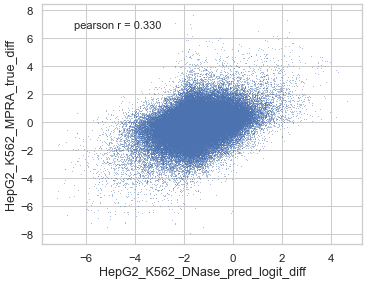

In [29]:
plot_logit_diff(main_df, 'HepG2', 'K562', 'DNase')
# plot_logit_diff(main_df, 'HepG2', 'SKNSH', 'DNase')
# plot_logit_diff(main_df, 'K562', 'SKNSH', 'DNase')